In [104]:
##-----Library Imports------##
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline
import seaborn as sns

In [105]:
##-----STEP ONE: Import AirBnB Data-----##
data_path = "2-Feature Engineering - All Present.csv"
df = pd.read_csv(data_path)
pd.set_option('display.max_columns', None)
df.head(10)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,host_count_entire,host_count_private,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,0-49%,100%,50-89%,90-99%,unknown,entire,hotel,private,shared,a few days or more,within a day,within a few hours,within an hour,flexible,luxury_moderate,luxury_super_strict_125,luxury_super_strict_95,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,amenity_scores
0,3191,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...",Beautiful self catering luxury cottage in cent...,"This is a lovely, separate, self-catering cott...",none,"Mowbray is on the Southern Suburbs line, 6km (...","There are pets on the property. One cat, who w...",The train station is about 400m from the cotta...,Fully self-contained cottage with separate ent...,"I live in the main house on the property, and ...","There is no smoking in the cottage, but you ca...",2008-10-21,I'm single and love to travel and meeting peop...,within an hour,100%,1.0,1.0,1.0,1.0,57.0,62,ZA,South Africa,-33.94739,18.47600,1,21,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Free...",661.0,2656.082216,211.000000,2,0.0,3,730,3,3,730,730,3.0,730.0,1,2,20,50,319,49,7,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,0,1,0,moderate,0,0,1,1,0,0,0.610000,6.493754,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2663.663320
1,13044,JAMBO Guest House / Green Room,The Green Room at Jambo Guest House is a sligh...,"Jambo, which means hello in Swahili, is a gues...",The Green Room at Jambo Guest House is a sligh...,none,Green Point is a popular leisure district domi...,Very centrally situated and walking distance t...,A lot of big attractions are within walking di...,Guests will have access to their own private r...,Barry and Mina will be around to ensure you ha...,We expect our guests to be well behaved. Only ...,2009-11-02,We have been running multi Award Winning Jambo...,within an hour,100%,0.0,5.0,1.0,0.0,115.0,125,ZA,South Africa,-33.90771,18.40535,1,3,Hotel room,2,1.0,1.0,1.0,Real Bed,"TV,Wifi,Air conditioning,Breakfast,Free street...",2105.0,0.000000,0.000000,2,0.0,3,30,1,3,30,30,1.1,30.0,1,0,0,0,0,2,0,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,1,0,strict_14_with_grace_period,0,0,5,0,0,0,0.020000,7.652071,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1459.786779
2,15007,Blaauwberg House,Welcome to our self-catering beach-front famil...,The house sleeps 6 and has all necessary ameni...,Welcome to our self-catering beach-front famil...,none,"Bloubergstrand is a lovely, cosy suburb near C...",Please note we do not provide beach towels at ...,We're located about 25 minutes drive out on th...,Guests have access to the full self-catering h...,"Ingrid, our booking manager, will meet you and...",Please ensure that arrangements are made for y...,2009-12-01,Proud to

In [106]:
##-----Rename neighbourhood for use with census data-----##
df = df.rename(columns={"neighbourhood_cleansed": "ward"})

### Novel Feature One: Demographic Data - Income###

In [107]:
##-----STEP TWO: Import Demographic Data-----##
data_path = "demographic_data.csv"
demographic = pd.read_csv(data_path)
pd.set_option('display.max_columns', None)
demographic.tail(10)

,ward,income
106,107,230700
107,108,29400
108,109,57300
109,110,57300
110,111,57300
111,112,230700
112,113,230700
113,114,14600
114,115,115100
115,116,57300


In [108]:
##--Merge datasets--##
merged = pd.merge(df, demographic, on='ward', how='outer')
merged.head(10)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,ward,zipcode,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,host_count_entire,host_count_private,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,0-49%,100%,50-89%,90-99%,unknown,entire,hotel,private,shared,a few days or more,within a day,within a few hours,within an hour,flexible,luxury_moderate,luxury_super_strict_125,luxury_super_strict_95,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,amenity_scores,income
0,3191.0,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...",Beautiful self catering luxury cottage in cent...,"This is a lovely, separate, self-catering cott...",none,"Mowbray is on the Southern Suburbs line, 6km (...","There are pets on the property. One cat, who w...",The train station is about 400m from the cotta...,Fully self-contained cottage with separate ent...,"I live in the main house on the property, and ...","There is no smoking in the cottage, but you ca...",2008-10-21,I'm single and love to travel and meeting peop...,within an hour,100%,1.0,1.0,1.0,1.0,57.0,62.0,ZA,South Africa,-33.94739,18.47600,1.0,21.0,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Free...",661.0,2656.082216,211.000000,2.0,0.0,3.0,730.0,3.0,3.0,730.0,730.0,3.0,730.0,1.0,2.0,20.0,50.0,319.0,49.0,7.0,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,0.0,1.0,0.0,moderate,0.0,0.0,1.0,1.0,0.0,0.0,0.610000,6.493754,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2663.663320,115100
1,26828.0,world cup accomodation,NaN,Situated close to the Green Point Stadium. Ava...,Situated close to the Green Point Stadium. Ava...,none,NaN,NaN,NaN,NaN,NaN,NaN,2010-04-27,NaN,within an hour,unknown,0.0,1.0,1.0,0.0,57.0,97.0,ZA,South Africa,-33.93596,18.46945,0.0,1.0,Entire home/apt,3.0,1.0,3.0,2.0,Real Bed,NaN,6314.0,2656.082216,322.727352,1.0,0.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,1.0,30.0,60.0,90.0,365.0,0.0,0.0,94.834741,9.656356,9.572654,9.762728,9.769081,9.719734,9.537054,0.0,0.0,0.0,flexible,0.0,0.0,1.0,1.0,0.0,0.0,0.919543,8.750525,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,115100
2,120080.0,Green Elephant Backpackers Dorm Bed,NaN,Dorm Bed in 6 bed Dorm Close to Groote Schuur ...,Dorm Bed in 6 bed Dorm Close to Groote Schuur ...,none,NaN,NaN,NaN,NaN,NaN,"To comply with local laws, we require to scan ...",2011-05-19,I am Howard from The Green Elephant Guesthouse...,within a day,50-89%,0.0,7.0,1.0,0.0,57.0,97.0,ZA,South Africa,-33.93837,18.46609,1.0,23.0,Shared room,6.0,1.0,1.0,1.0,Real Bed,"Wifi,Kitchen,Washer / Dryer,Breakfast,Free str...",182.0,2656.082216,322.727352,1.0,185.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,1.0,30.0,60.0,90.0,365.0,35.0,8.0,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.0,0.0,0.0,strict_14_with_grace_period,0.0,0.0,7.0,0.0,4.0,3.0,0.350000,5.204007,0.0,0.0,

In [109]:
merged["log_price"].corr(merged["income"])

0.015956389879457484

In [110]:
#check for missing data
missing_data = merged.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

id
False    24451
True        18
Name: id, dtype: int64

name
False    24450
True        19
Name: name, dtype: int64

summary
False    23675
True       794
Name: summary, dtype: int64

space
False    17697
True      6772
Name: space, dtype: int64

description
False    23995
True       474
Name: description, dtype: int64

experiences_offered
False    24451
True        18
Name: experiences_offered, dtype: int64

neighborhood_overview
False    16640
True      7829
Name: neighborhood_overview, dtype: int64

notes
True     13626
False    10843
Name: notes, dtype: int64

transit
False    15866
True      8603
Name: transit, dtype: int64

access
False    14163
True     10306
Name: access, dtype: int64

interaction
False    15200
True      9269
Name: interaction, dtype: int64

house_rules
False    12296
True     12173
Name: house_rules, dtype: int64

host_since
False    24415
True        54
Name: host_since, dtype: int64

host_about
False    13123
True     11346
Name: host_about, dtype: int64



[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Income')]

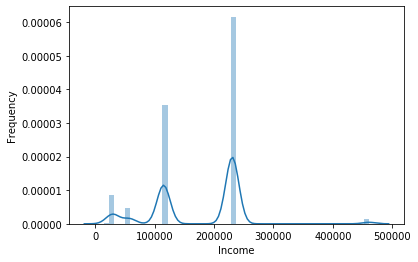

In [111]:
##----Plot distribution of income data----##
sns_plot = sns.distplot(merged["income"]);
sns_plot.set(xlabel = "Income", ylabel = "Frequency")

In [112]:
# Bin into four categories
merged["income"] = pd.cut(merged["income"], bins=[0, 29400, 57400, 116000, 240000, 500000], labels=['<30000', '57300', '115100', '230700', '>230700'], include_lowest=True)

# Converting to string
merged["income"] = merged["income"].astype('str')

# Replace nulls with 'unknown'
merged["income"].replace('nan', 'unknown', inplace=True)

# Category counts
merged["income"].value_counts()

230700     13467
115100      7734
<30000      1935
57300       1036
>230700      297
Name: income, dtype: int64

In [113]:
#one hot encode
dummy_variable_1=pd.get_dummies(merged["income"])
dummy_variable_1=dummy_variable_1.rename(columns={'<30000':'Low income', "57300":'Middle-Low Income', '115100':'Medium Income', '230700': 'High Income', '>230700': 'Exceedingly High Income'})
merged = pd.concat([merged, dummy_variable_1], axis=1)
merged.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,ward,zipcode,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,host_count_entire,host_count_private,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,0-49%,100%,50-89%,90-99%,unknown,entire,hotel,private,shared,a few days or more,within a day,within a few hours,within an hour,flexible,luxury_moderate,luxury_super_strict_125,luxury_super_strict_95,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,amenity_scores,income,Medium Income,High Income,Middle-Low Income,Low income,Exceedingly High Income
0,3191.0,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...",Beautiful self catering luxury cottage in cent...,"This is a lovely, separate, self-catering cott...",none,"Mowbray is on the Southern Suburbs line, 6km (...","There are pets on the property. One cat, who w...",The train station is about 400m from the cotta...,Fully self-contained cottage with separate ent...,"I live in the main house on the property, and ...","There is no smoking in the cottage, but you ca...",2008-10-21,I'm single and love to travel and meeting peop...,within an hour,100%,1.0,1.0,1.0,1.0,57.0,62.0,ZA,South Africa,-33.94739,18.47600,1.0,21.0,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Free...",661.0,2656.082216,211.000000,2.0,0.0,3.0,730.0,3.0,3.0,730.0,730.0,3.0,730.0,1.0,2.0,20.0,50.0,319.0,49.0,7.0,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,0.0,1.0,0.0,moderate,0.0,0.0,1.0,1.0,0.0,0.0,0.610000,6.493754,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2663.663320,115100,1,0,0,0,0
1,26828.0,world cup accomodation,NaN,Situated close to the Green Point Stadium. Ava...,Situated close to the Green Point Stadium. Ava...,none,NaN,NaN,NaN,NaN,NaN,NaN,2010-04-27,NaN,within an hour,unknown,0.0,1.0,1.0,0.0,57.0,97.0,ZA,South Africa,-33.93596,18.46945,0.0,1.0,Entire home/apt,3.0,1.0,3.0,2.0,Real Bed,NaN,6314.0,2656.082216,322.727352,1.0,0.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,1.0,30.0,60.0,90.0,365.0,0.0,0.0,94.834741,9.656356,9.572654,9.762728,9.769081,9.719734,9.537054,0.0,0.0,0.0,flexible,0.0,0.0,1.0,1.0,0.0,0.0,0.919543,8.750525,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,115100,1,0,0,0,0
2,120080.0,Green Elephant Backpackers Dorm Bed,NaN,Dorm Bed in 6 bed Dorm Close to Groote Schuur ...,Dorm Bed in 6 bed Dorm Close to Groote Schuur ...,none,NaN,NaN,NaN,NaN,NaN,"To comply with local laws, we require to scan ...",2011-05-19,I am Howard from The Green Elephant Guesthouse...,within a day,50-89%,0.0,7.0,1.0,0.0,57.0,97.0,ZA,South Africa,-33.93837,18.46609,1.0,23.0,Shared room,6.0,1.0,1.0,1.0,Real Bed,"Wifi,Kitchen,Washer / Dryer,Breakfast,Free str...",182.0,2656.082216,322.727352,1.0,185.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,1.0,30.0,60.0,90.0,365.0,35.0,8.0,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,

In [114]:
#check correlation
merged["log_price"].corr(merged["Low income"])

0.0859722834479283

### Novel Feature Two: Supply and Demand###

In [115]:
#Supply and demand
ward_count = pd.DataFrame(df.ward.value_counts().reset_index())
ward_count.columns = ['ward', 'listing_count']
print(ward_count)

# merge 'df' & 'brands_count'
#merged = pd.merge(df, brands, on='brands')
#print(merged)
supply_demand_merged = pd.merge(df, ward_count, on='ward', how='outer')
supply_demand_merged.head(10)

     ward  listing_count
0   115.0           4307
1    54.0           3188
2    77.0           1965
3    23.0           1330
4    64.0           1149
..    ...            ...
93   78.0              1
94   99.0              1
95   34.0              1
96   52.0              1
97  106.0              1

[98 rows x 2 columns]


,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,ward,zipcode,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,host_count_entire,host_count_private,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,0-49%,100%,50-89%,90-99%,unknown,entire,hotel,private,shared,a few days or more,within a day,within a few hours,within an hour,flexible,luxury_moderate,luxury_super_strict_125,luxury_super_strict_95,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,amenity_scores,listing_count
0,3191,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...",Beautiful self catering luxury cottage in cent...,"This is a lovely, separate, self-catering cott...",none,"Mowbray is on the Southern Suburbs line, 6km (...","There are pets on the property. One cat, who w...",The train station is about 400m from the cotta...,Fully self-contained cottage with separate ent...,"I live in the main house on the property, and ...","There is no smoking in the cottage, but you ca...",2008-10-21,I'm single and love to travel and meeting peop...,within an hour,100%,1.0,1.0,1.0,1.0,57.0,62,ZA,South Africa,-33.94739,18.47600,1,21,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Free...",661.0,2656.082216,211.000000,2,0.0,3,730,3,3,730,730,3.0,730.0,1,2,20,50,319,49,7,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,0,1,0,moderate,0,0,1,1,0,0,0.610000,6.493754,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2663.663320,819
1,26828,world cup accomodation,NaN,Situated close to the Green Point Stadium. Ava...,Situated close to the Green Point Stadium. Ava...,none,NaN,NaN,NaN,NaN,NaN,NaN,2010-04-27,NaN,within an hour,unknown,0.0,1.0,1.0,0.0,57.0,97,ZA,South Africa,-33.93596,18.46945,0,1,Entire home/apt,3,1.0,3.0,2.0,Real Bed,NaN,6314.0,2656.082216,322.727352,1,0.0,1,730,1,1,730,730,1.0,730.0,1,30,60,90,365,0,0,94.834741,9.656356,9.572654,9.762728,9.769081,9.719734,9.537054,0,0,0,flexible,0,0,1,1,0,0,0.919543,8.750525,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0.000000,819
2,120080,Green Elephant Backpackers Dorm Bed,NaN,Dorm Bed in 6 bed Dorm Close to Groote Schuur ...,Dorm Bed in 6 bed Dorm Close to Groote Schuur ...,none,NaN,NaN,NaN,NaN,NaN,"To comply with local laws, we require to scan ...",2011-05-19,I am Howard from The Green Elephant Guesthouse...,within a day,50-89%,0.0,7.0,1.0,0.0,57.0,97,ZA,South Africa,-33.93837,18.46609,1,23,Shared room,6,1.0,1.0,1.0,Real Bed,"Wifi,Kitchen,Washer / Dryer,Breakfast,Free str...",182.0,2656.082216,322.727352,1,185.0,1,365,1,1,365,365,1.0,365.0,1,30,60,90,365,35,8,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0,0,0,strict_14_with_grace_period,0,0,7,0,4,3,0.350000,5.204007,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1261.356183,819
3,256720,Green Elephant Private Room,NaN,Closest Backpackers to Groote Schuur Hospital ...,Closest Backpackers to Groote Schuur Hospital ...,none,NaN,NaN,NaN,NaN,NaN,"To comply with local laws, we requir

In [116]:
#check correlation
supply_demand_merged["log_price"].corr(supply_demand_merged["listing_count"])

0.17505629560865626

In [117]:
#listings count per ward
ward_count.head(20)

,ward,listing_count
0,115.0,4307
1,54.0,3188
2,77.0,1965
3,23.0,1330
4,64.0,1149
5,74.0,1130
6,61.0,947
7,57.0,819
8,59.0,769
9,62.0,730


In [118]:
##----Create dataset with new spatial features----##
df_spatial = merged[["log_price", "ward", "Low income","Middle-Low Income","Medium Income","High Income", "Exceedingly High Income"]]
#df_spatial["listing_count"] = supply_demand_merged["listing_count"]
#df_spatial = pd.merge(df_spatial, supply_demand_merged[["ward", "listing_count"]], on='ward', how='outer')
df_spatial_new = pd.merge(df_spatial, ward_count, on='ward', how='outer')
df_spatial_new.head(10)

,log_price,ward,Low income,Middle-Low Income,Medium Income,High Income,Exceedingly High Income,listing_count
0,6.493754,57.0,0,0,1,0,0,819.0
1,8.750525,57.0,0,0,1,0,0,819.0
2,5.204007,57.0,0,0,1,0,0,819.0
3,6.304449,57.0,0,0,1,0,0,819.0
4,5.204007,57.0,0,0,1,0,0,819.0
5,6.469250,57.0,0,0,1,0,0,819.0
6,5.347108,57.0,0,0,1,0,0,819.0
7,6.469250,57.0,0,0,1,0,0,819.0
8,6.329721,57.0,0,0,1,0,0,819.0
9,7.022868,57.0,0,0,1,0,0,819.0


In [119]:
df_spatial_new["log_price"].corr(df_spatial_new["Middle-Low Income"])

-0.055562496575872575

In [120]:
df_spatial_new["log_price"].corr(df_spatial_new["listing_count"])

0.17505629560865626

In [121]:
df_spatial_new.to_csv("3- Spatial Features - 1+2.csv", index=False)

### Novel Feature Three: Distance to Landmarks###

In [122]:
from arcgis.gis import GIS
from arcgis.geocoding import geocode

In [123]:
gis = GIS('http://www.arcgis.com', 'SamBall999', 'taylorswift13')

#### Use this block to experiment with what you can get from arcgis

In [124]:
x = 18.379348 #coord33.9803° S, 18.4640° E
y = -33.951011 #coord
diff = 0.5 #tolerance to above coords in degrees (1deg=110km, 0.1deg=11km, 0.01deg=1.1km)
extent = {"xmin": x-diff,"xmax":x+diff, "ymin": y-diff,"ymax":y+diff}
geocode_fs = geocode("hudsons", 
                     #POI['extent'], 
                     extent,
                     location=[x, y],
                     #category="attraction",
                     #out_fields="Place_addr, PlaceName",
                     #distance=1000000,
                     max_locations=500,
                     as_featureset=True)

geocode_df = geocode_fs.df
#geocode_df.head(20)

#print(geocode_df.head(1)["Distance"])
geocode_df

,Loc_name,Status,Score,Match_addr,LongLabel,ShortLabel,Addr_type,Type,PlaceName,Place_addr,Phone,URL,Rank,AddBldg,AddNum,AddNumFrom,AddNumTo,AddRange,Side,StPreDir,StPreType,StName,StType,StDir,BldgType,BldgName,LevelType,LevelName,UnitType,UnitName,SubAddr,StAddr,Block,Sector,Nbrhd,District,City,MetroArea,Subregion,Region,RegionAbbr,Territory,Zone,Postal,PostalExt,Country,LangCode,Distance,X,Y,DisplayX,DisplayY,Xmin,Xmax,Ymin,Ymax,ExInfo,OBJECTID,SHAPE
0,World,M,99.99,Hudson's,"Hudson's, Kloof St, Gardens, Cape Town, Wester...",Hudson's,POI,Burgers,Hudson's,"Kloof St, Cape Town, Western Cape, 8001",+27 214265974,,19,,,,,,,,,Kloof,St,,,,,,,,,Kloof St,,,,Gardens,Cape Town,,Cape Town,Western Cape,Western Cape,,,8001,,ZAF,ENG,3754.846775,18.41099,-33.92977,18.41099,-33.92977,18.40599,18.41599,-33.93477,-33.92477,,1,"{'x': 18.410990000000027, 'y': -33.92976999999..."
1,World,M,100.00,Hudsons,"Hudsons, St Andrews Rd, Rondebosch, Cape Town,...",Hudsons,POI,International Food,Hudsons,"St Andrews Rd, Cape Town, Western Cape, 7700",+27 214331496,,19,,,,,,,,,St Andrews,Rd,,,,,,,,,St Andrews Rd,,,,Rondebosch,Cape Town,,Cape Town,Western Cape,Western Cape,,,7700,,ZAF,ENG,8594.280156,18.47162,-33.96178,18.47162,-33.96178,18.46662,18.47662,-33.96678,-33.95678,,2,"{'x': 18.47162000000003, 'y': -33.961779999999..."
2,World,M,99.99,Hudson's,"Hudson's, The Bonnie Mile, Cape Winelands, Wes...",Hudson's,POI,Continental Food,Hudson's,"Stellenbosch, Western Cape",+27 218813590,http://www.theburgerjoint.co.za,19,,,,,,,,,,,,,,,,,,,,,,,The Bonnie Mile,Stellenbosch,,Cape Winelands,Western Cape,Western Cape,,,,,ZAF,ENG,39316.284799,18.80550,-33.95930,18.80550,-33.95930,18.80050,18.81050,-33.96430,-33.95430,,3,"{'x': 18.805500000000052, 'y': -33.95929999999..."


#### Use these blocks to experiment on dataset

In [125]:
#df_in = pd.read_csv("4-Feature Selection - With Outliers - 34 Features - Small Sample 2400.csv")
df_final = pd.read_csv("2-Feature Engineering - All Present.csv")
df_final = df_final.head(200) #test on sample
print(df_final.shape)

(200, 97)


In [126]:
#find distance between each listing and a given landmark/facility (shown: "beach")
#repeated for table mountain, promenade
for index, row in df_final.iterrows():
    print(index,end=" ")
    x = row['longitude']
    y = row['latitude']
    diff = 0.9 #0.01 #0.005
    extent = {"xmin": x-diff,"xmax":x+diff, "ymin": y-diff,"ymax":y+diff}
    geocode_fs = geocode("beach", extent,location=[x, y], out_fields="PlaceName,Distance", max_locations=50,as_featureset=True)
    geocode_df = geocode_fs.df
    #df_in.loc[index,"num_restaurants"] = len(geocode_fs)
    df_final.loc[index,"beach_dist"] = geocode_df.loc[0,"Distance"]


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 

Exception: An unknown error occurred: Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 377, in _make_request
    httplib_response = conn.getresponse(buffering=True)
TypeError: getresponse() got an unexpected keyword argument 'buffering'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/arcgis/gis/_impl/_con/_connection.py", line 661, in post
    files=files)
  File "/opt/anaconda3/lib/python3.7/site-packages/requests/sessions.py", line 581, in post
    return self.request('POST', url, data=data, json=json, **kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/requests/sessions.py", line 533, in request
    resp = self.send(prep, **send_kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/requests/sessions.py", line 646, in send
    r = adapter.send(request, **kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/requests/adapters.py", line 449, in send
    timeout=timeout
  File "/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 380, in _make_request
    httplib_response = conn.getresponse()
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 1336, in getresponse
    response.begin()
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 306, in begin
    version, status, reason = self._read_status()
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 267, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/opt/anaconda3/lib/python3.7/socket.py", line 589, in readinto
    return self._sock.recv_into(b)
  File "/opt/anaconda3/lib/python3.7/site-packages/urllib3/contrib/pyopenssl.py", line 297, in recv_into
    return self.connection.recv_into(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/OpenSSL/SSL.py", line 1821, in recv_into
    result = _lib.SSL_read(self._ssl, buf, nbytes)
KeyboardInterrupt


In [ ]:
print(df_final["log_price"].corr(df_final["beach_dist"]))
df_final.tail(50)
#print(df_final.shape)

#### Count number of facilities in radius

In [ ]:
#Create alternate that counts number of facilities in radius
#feature = "Wine" #0.05 - 0.0433 corr
#feature = "Wine" #0.02 - 0.08103 corr
#feature = "Promenade"
feature = "Wine"

#feature = "Restaurant" 

for index, row in df_final.iterrows():
    print(index,end=" ")
    x = row['longitude']
    y = row['latitude']
    diff = 0.02 
    extent = {"xmin": x-diff,"xmax":x+diff, "ymin": y-diff,"ymax":y+diff}
    geocode_fs = geocode(feature, extent,location=[x, y], out_fields="PlaceName,Distance", max_locations=50,as_featureset=True)
    
    if(len(geocode_fs)==0):
        df_final.loc[index,feature] = 0
    else:
        geocode_df = geocode_fs.df
        df_final.loc[index,feature] = len(geocode_fs)
        #df_in.loc[index,feature] = geocode_df.loc[0,"Distance"]


In [ ]:
df_final.to_csv("3-Spatial Features - 3.csv", index=False)